In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
  x: scalar or numpy array of any size.
  Returns:
  y: logistic function applied to x.
  """
  y = 1/(1+ np.exp(-x))
  return y


In [26]:
import numpy as np
def test_logistic_function():
  """
  Test cases for the logistic_function.
  """
  x_scalar = 0
  expected_output_scalar = round(1 / (1 + np.exp(0)), 3)
  assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
  x_pos = 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3)
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3)
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
  x_array = np.array([0, 2, -3])
  expected_output_array = np.array([0.5, 0.881, 0.047])
  assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
  print("All tests passed!")
test_logistic_function()

All tests passed!


In [27]:
def log_loss(y_true, y_pred):
  """
  Computes the log loss between true labels and predicted probabilities.
  Arguments:
  y_true: true labels.
  y_pred: predicted probabilities.
  Returns:
  loss
  """
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss


In [28]:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  y_true = 1
  y_pred = 1
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  y_true = 0
  y_pred = 0
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred)
  except ValueError:
    pass
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred)
  except ValueError:
    pass
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))
  x_array = np.array([0, 2, -3])
  expected_output_array = np.array([0.5, 0.881, 0.047])
  assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
  print("All tests passed!")
test_logistic_function()

All tests passed!


In [29]:
def cost_function(y_true,y_pred):
  """
  """
  assert len (y_true) == len (y_pred),"Length of true values and length of predicted values do not match"
  n = len(y_true)
  loss_vec = log_loss(y_true,y_pred)
  cost = np.sum(loss_vec)/n
  return cost


In [30]:
def test_cost_function():
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  result = cost_function(y_true, y_pred)
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
test_cost_function()

Test passed for simple case!


In [31]:
def costfunction_logreg(X,y,w,b):
  """
  Computes the cost function, given data and model parameters.
  Arguments:
  X: independent variable.
  y: dependent variable.
  w: weight parameter.
  b: bias parameter.
  """
  n,d = X.shape
  assert len(y) == n, "Number of feature observations and number of target observations do not match."
  assert len(w) == d, "Number of features and number of weight parameters do not match."
  z = np.dot(X,w)+ b
  y_pred = logistic_function(z)
  return cost_function(y,y_pred)


In [32]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


In [33]:
def compute_gradient(X,y,w,b):
  """
  Computes the gradient for logistic regression.
  Arguments:
  X: independent variable.
  y: dependent variable.
  w: weight parameter.
  b: bias parameter.
  """
  n,d = X.shape
  assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
  assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

  y_pred = logistic_function(np.dot(X,w)+b)

  grad_w = (1/n)* np.dot(X. T,(y_pred - y))
  grad_b = (1/n)* np.sum(y_pred - y)

  return grad_w,grad_b

In [34]:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [35]:
def gradient_descent(X, y,w,b, alpha , n_iter, show_cost = False, show_params = True):
  """
  Implements gradient descent.
  Arguments:
  X: independent variable.
  y: dependent variable.
  w: weight parameter.
  b: bias parameter.
  alpha: learning rate.
  n_iter: number of iterations.
  show_cost: boolean to show cost.
  show_params: boolean to show parameters.

  Returns:
  w: updated weight parameter.
  b: updated bias parameter.
  """
  n,d = X.shape
  assert len(y) == n, "Number of observations in X and y do not match"
  assert len(w) == d,"Number of features in X and w do not match"
  cost_history=[]
  params_history=[]
  for i in range(n_iter):
    grad_w,grad_b = compute_gradient(X,y,w,b)

    w -= alpha * grad_w
    b -= alpha * grad_b

    cost = costfunction_logreg(X,y,w,b)
    cost_history.append(cost)
    params_history.append((w.copy(),b))

    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
    if show_params and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: w = {w}, b = {b:.6f}")

  return w,b,cost_history,params_history






In [36]:
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]])
  y = np.array([1, 0])
  w = np.zeros(X.shape[1])
  b = 0.0
  alpha = 0.1
  n_iter = 100
  w, b, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,show_params=False)

  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")
test_gradient_descent()

All tests passed!


In [37]:
def prediction(X,w,b,threshold =0.5):
  """
  Predicts binary outcomes.

  Arguments:
  X: independent variable.
  w: weight parameter.
  b: bias parameter.
  threshold: threshold for binary classification.
  Returns:
  y_pred: predicted binary outcomes.
  """

  y_test_prob = logistic_function(np.dot(X,w)+b)
  y_pred = (y_test_prob >= threshold).astype(int)
  return y_pred


In [38]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0])
  b_test = 0.0
  threshold = 0.5

  expected_output = np.array([0, 1, 1])
  y_pred = prediction(X_test, w_test, b_test, threshold)
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()

Test passed!


In [39]:
def evaluate_classification(y_true, y_pred):
  """
  Computes the confusion matrix, precision, recall, and F1-score for binary classification.
  """
  TP = np.sum((y_true == 1) & (y_pred == 1))
  TN = np.sum((y_true == 0) & (y_pred == 0))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))

  confusion_matrix = np.array([[TN, FP], [FN, TP]])

  precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0.0 else 0.0

  metrics = {
      "confusion_matrix": confusion_matrix,
      "precision": precision,
      "recall": recall,
      "f1_score": f1_score
  }

  return metrics

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)



In [41]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [42]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


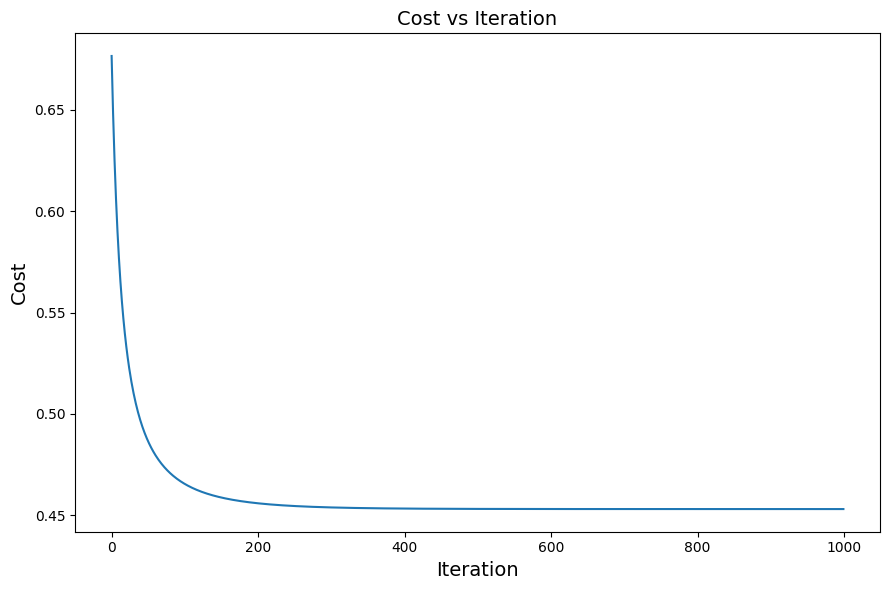

In [45]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000


w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter,
    show_cost=True, show_params=False
)
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


In [48]:
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

metrics = evaluate_classification(y_test, y_test_pred)

confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55
